In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading data from CSV file

df = pd.read_csv("US Superstore data.csv")

## Exlploratory Data Analysis

In [4]:
# Features of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
df=df.drop(['Row ID', 'Country'],axis=1)

In [6]:
# Creating dictionary of Categories and Sub-Categories of the products in the data

categories = df['Category'].unique()
subCategories = df['Sub-Category'].unique()

catDict = {}
for i in categories:
    catDict[i] = df[df['Category'] == i]['Sub-Category'].unique()
    print(f"{i} : {df[df['Category'] == i]['Sub-Category'].unique()}")

Furniture : ['Bookcases' 'Chairs' 'Tables' 'Furnishings']
Office Supplies : ['Labels' 'Storage' 'Art' 'Binders' 'Appliances' 'Paper' 'Envelopes'
 'Fasteners' 'Supplies']
Technology : ['Phones' 'Accessories' 'Machines' 'Copiers']


In [7]:
# Creating dictionary of States and cities

states = df['State'].unique()
cities = df['City'].unique()

geoDict = {}
for i in states:
    geoDict[i] = df[df['State'] == i]['City'].unique()
    print(f"{i} : {df[df['State'] == i]['City'].unique()}")

Kentucky : ['Henderson' 'Richmond' 'Louisville' 'Florence' 'Murray' 'Bowling Green'
 'Georgetown' 'Owensboro']
California : ['Los Angeles' 'San Francisco' 'Roseville' 'Pasadena' 'San Jose'
 'Redlands' 'Whittier' 'Santa Clara' 'San Diego' 'Brentwood' 'Inglewood'
 'Long Beach' 'Hesperia' 'Huntington Beach' 'Concord' 'Costa Mesa'
 'Anaheim' 'Vallejo' 'Mission Viejo' 'Lancaster' 'Lake Elsinore'
 'Santa Ana' 'Salinas' 'Riverside' 'Torrance' 'Oceanside' 'Murrieta'
 'Oakland' 'Encinitas' 'Antioch' 'Escondido' 'Fresno' 'Fairfield'
 'Pico Rivera' 'Westminster' 'Pomona' 'Laguna Niguel' 'San Bernardino'
 'Ontario' 'Rancho Cucamonga' 'Stockton' 'Sunnyvale' 'Manteca'
 'Sacramento' 'Thousand Oaks' 'Coachella' 'La Quinta' 'Vacaville'
 'Bakersfield' 'Redondo Beach' 'Apple Valley' 'Woodland' 'San Mateo'
 'Visalia' 'Temecula' 'Yucaipa' 'Chula Vista' 'Lakewood' 'Citrus Heights'
 'San Gabriel' 'Danville' 'Moreno Valley' 'Santa Barbara' 'La Mesa'
 'Lake Forest' 'Redding' 'Chico' 'Redwood City' 'Santa Maria

In [8]:
# Changing the 'Order date' feature to datetime format

df['Order Date'] = df['Order Date'].astype('datetime64[ns]')
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.weekday
df['Time'] = df['Order Date'].apply(lambda x: x.toordinal())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   object        
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   City           9994 non-null   object        
 8   State          9994 non-null   object        
 9   Postal Code    9994 non-null   int64         
 10  Region         9994 non-null   object        
 11  Product ID     9994 non-null   object        
 12  Category       9994 non-null   object        
 13  Sub-Category   9994 non-null   object        
 14  Product Name   9994 non-null   object        
 15  Sales          9994 n

## Time Series Analysis

In [9]:
# Setting the date as index of the data frame

df_trans = df.copy()
df_trans.set_index("Order Date", inplace = True)
df_trans.sort_values(by=['Order Date'], inplace=True, ascending=True)

In [10]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9994 entries, 2014-01-03 to 2017-12-30
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Ship Date      9994 non-null   object 
 2   Ship Mode      9994 non-null   object 
 3   Customer ID    9994 non-null   object 
 4   Customer Name  9994 non-null   object 
 5   Segment        9994 non-null   object 
 6   City           9994 non-null   object 
 7   State          9994 non-null   object 
 8   Postal Code    9994 non-null   int64  
 9   Region         9994 non-null   object 
 10  Product ID     9994 non-null   object 
 11  Category       9994 non-null   object 
 12  Sub-Category   9994 non-null   object 
 13  Product Name   9994 non-null   object 
 14  Sales          9994 non-null   float64
 15  Quantity       9994 non-null   int64  
 16  Discount       9994 non-null   float64
 17  Profit         9994 non-null   flo

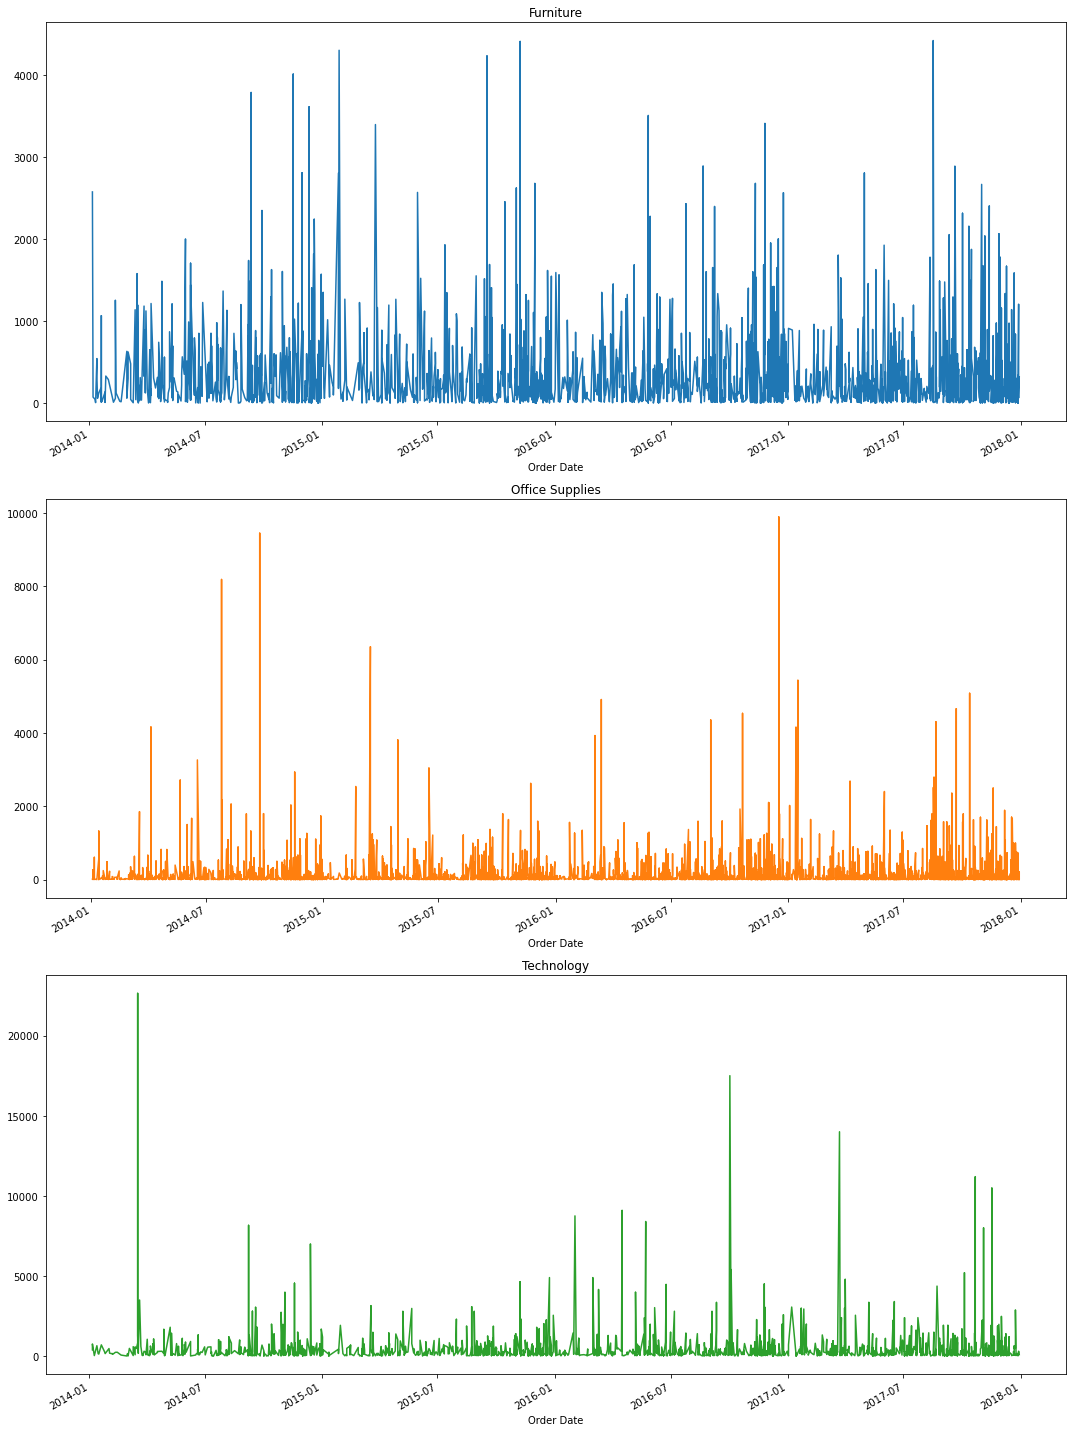

In [11]:
# Plotting the Sales of each Category

color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

fig, axs = plt.subplots(3,1,figsize=(15, 20))
axs = axs.flatten()
ax_idx = 0
for i in categories:
    df_trans[df_trans['Category'] == i]['Sales'].plot(title=i, color=next(color_cycle), ax=axs[ax_idx])
    ax_idx += 1
plt.tight_layout()
plt.show()

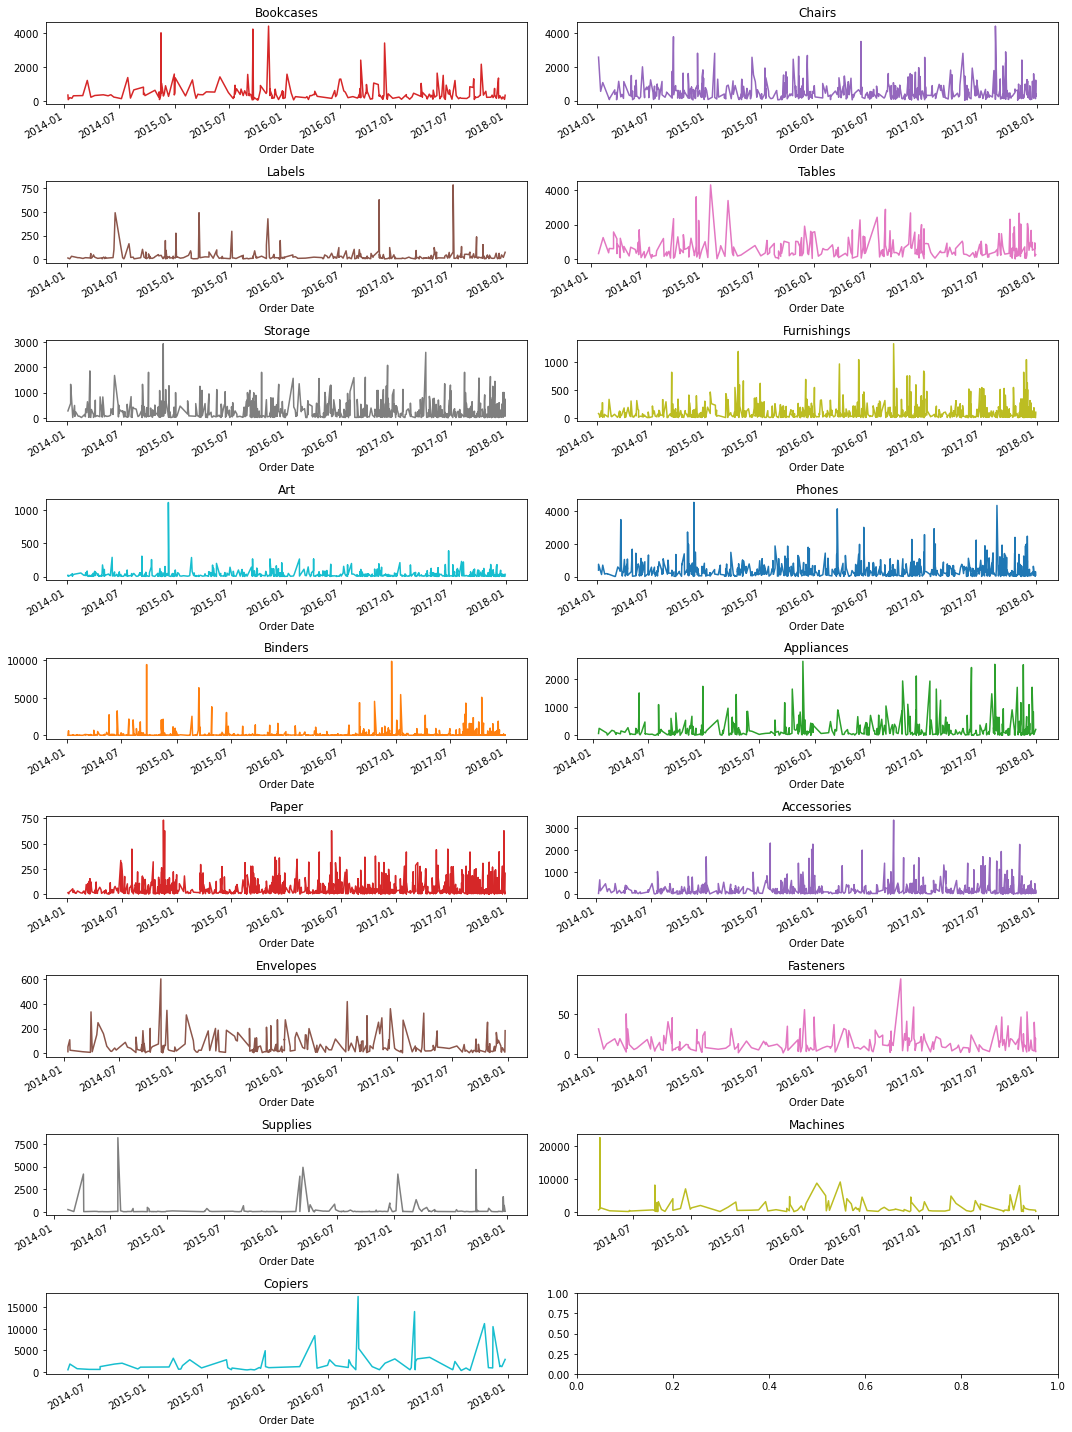

In [12]:
# Plotting the Sales of each Sub-Category

fig, axs = plt.subplots(9,2, figsize=(15, 20))
axs = axs.flatten()
ax_idx = 0
for i in subCategories:
    df_trans[df_trans['Sub-Category'] == i]['Sales'].plot(title=i, color=next(color_cycle), ax=axs[ax_idx])
    ax_idx += 1
plt.tight_layout()
plt.show()

In [13]:
# Average sales per day

df_sales =  pd.DataFrame(df_trans['Sales'].resample('D').mean())
df_sales = df_sales.interpolate(method='linear') 
df_sales.head()

,Sales
Order Date,
2014-01-03,16.448000
2014-01-04,96.020000
2014-01-05,19.536000
2014-01-06,489.677778
2014-01-07,43.579000


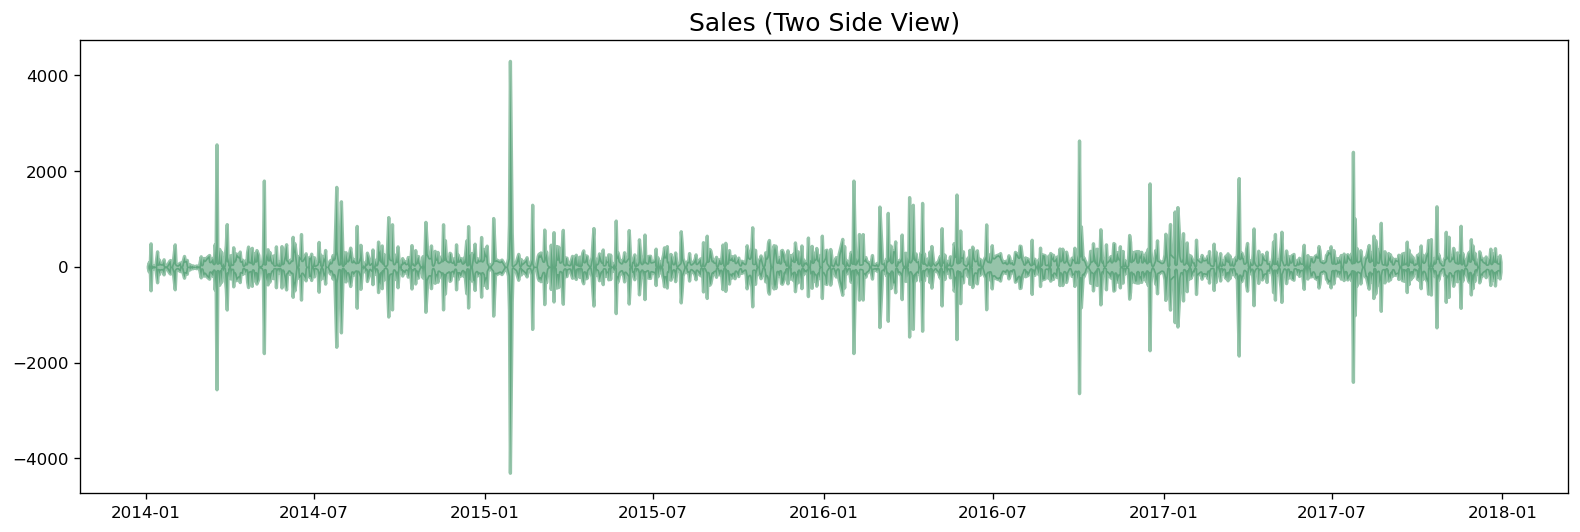

In [14]:
# Visualizing growth using two side view graph

fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(df_sales.index, y1=df_sales.Sales, y2=-df_sales.Sales, alpha=0.5, linewidth=2, color='seagreen')
#plt.ylim(-800, 800)
plt.title('Sales (Two Side View)', fontsize=15)
#plt.hlines(y=0, xmin=np.min(df.date), xmax=np.max(df.date), linewidth=.5)
plt.show()

<AxesSubplot:title={'center':'average sale: year'}, xlabel='Year'>

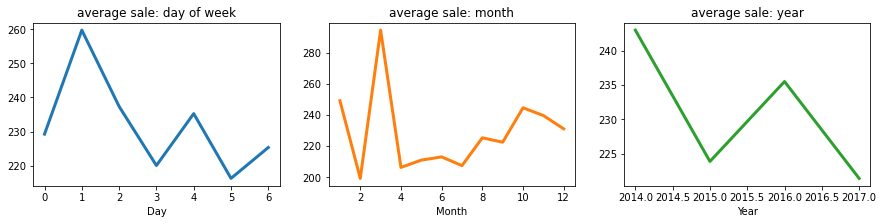

In [15]:
#

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))
df_trans.groupby('Day').mean()['Sales'].plot(kind='line', title='average sale: day of week', lw=3,color=color_pal[0], ax=ax1)
df_trans.groupby('Month').mean()['Sales'].plot(kind='line', title='average sale: month', lw=3,color=color_pal[1], ax=ax2)
df_trans.groupby('Year').mean()['Sales'].plot(kind='line', title='average sale: year', lw=3,color=color_pal[2], ax=ax3, )

In [16]:
#Stationarity test

from statsmodels.tsa.stattools import adfuller, kpss

# Perform Augmented Dickey-Fuller test:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

    
# Kwiatkowski-Phillips-Schmidt-Shin test:
def kpss_test(timeseries):
    print('Results of KPSS Test:')
    dftest = kpss(timeseries, regression='c')
    dfoutput = pd.Series(dftest[0:3], index=['Test Statistic','p-value','Truncated Lag #'])
    for key,value in dftest[3].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

adf_test(df_sales)
kpss_test(df_sales)

Results of Dickey-Fuller Test:
Test Statistic                  -20.876027
p-value                           0.000000
#Lags Used                        2.000000
Number of Observations Used    1455.000000
Critical Value (1%)              -3.434852
Critical Value (5%)              -2.863528
Critical Value (10%)             -2.567829
dtype: float64
Results of KPSS Test:
Test Statistic            0.116337
p-value                   0.100000
Truncated Lag #          24.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\ashwa\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [17]:
#Stationarity test for lag values

df_log = np.log(df_sales.Sales)
df_logDiff = df_log.diff()
df_logDiff.dropna(inplace=True)

adf_test(df_logDiff)
kpss_test(df_logDiff)

Results of Dickey-Fuller Test:
Test Statistic                -1.331956e+01
p-value                        6.499671e-25
#Lags Used                     2.300000e+01
Number of Observations Used    1.433000e+03
Critical Value (1%)           -3.434922e+00
Critical Value (5%)           -2.863559e+00
Critical Value (10%)          -2.567845e+00
dtype: float64
Results of KPSS Test:
Test Statistic            0.025401
p-value                   0.100000
Truncated Lag #          24.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\ashwa\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


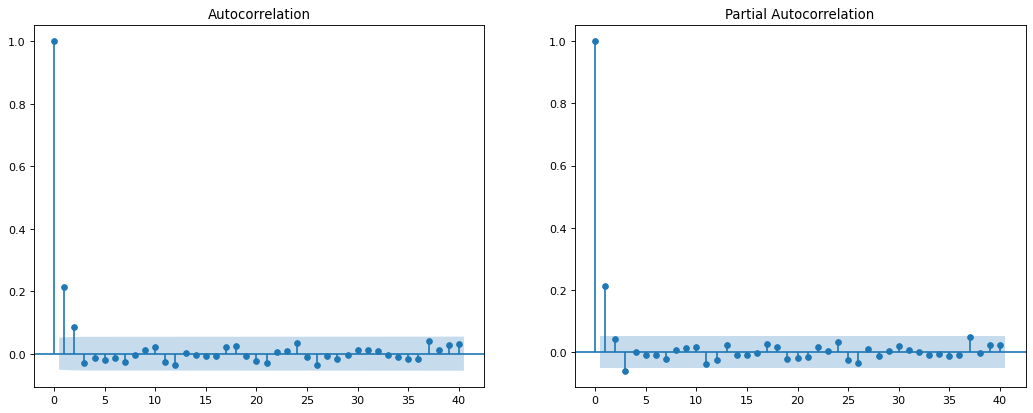

In [18]:
#Autocorrelation and Partial Autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
plot_acf(df_sales.Sales.tolist(), ax=ax1, lags=40)
plot_pacf(df_sales.Sales.tolist(), ax=ax2, lags=40)
plt.show()

## ARIMA Model

In [19]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima_model import ARIMA

#First 70% of data as train and test it on last 30% of the data

train = df_sales.iloc[:int(len(df_sales)*0.7),:]
test = df_sales.iloc[int(len(df_sales)*0.7):,:]

In [20]:
#ARIMA hyper-parameters tuning

from pmdarima import auto_arima
stepwise_fit = auto_arima(train.Sales, trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=14326.932, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=14389.495, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=14324.575, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=14331.849, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=14873.784, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=14326.225, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=14326.610, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=14328.035, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=14531.138, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.063 seconds


In [21]:
# Fitting the arima model with the train data

model=ARIMA(train.Sales,order=(1,0,0))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                 1020
Model:                     ARMA(1, 0)   Log Likelihood               -7159.287
Method:                       css-mle   S.D. of innovations            270.410
Date:                Thu, 02 Dec 2021   AIC                          14324.574
Time:                        18:29:47   BIC                          14339.357
Sample:                    01-03-2014   HQIC                         14330.187
                         - 10-18-2016                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         218.3588     11.315     19.299      0.000     196.182     240.535
ar.L1.Sales     0.2519      0.030      8.317      0.000       0.193       0.311
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.9691           +0.0000j            3.9691            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Order Date'>

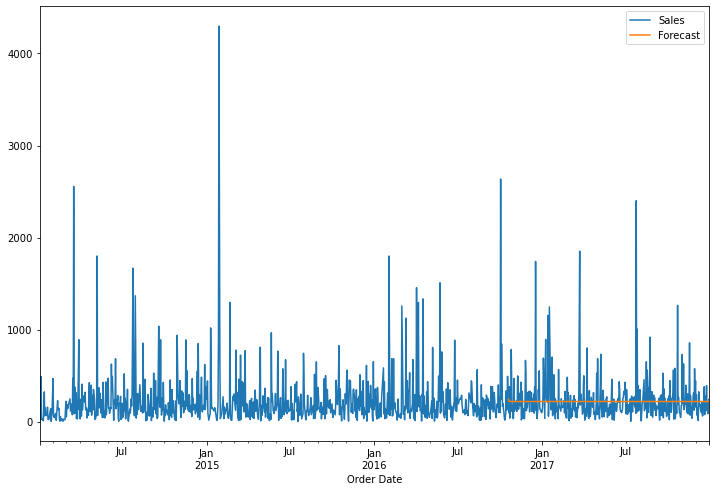

In [22]:
# Plotting the prediction values(Forecast) against the actual values(Sales) for ARIMA model

df_arima_sales = df_sales.copy()
df_arima_sales['Forecast'] = model_fit.predict(start = len(train), end = len(df_sales)-1, dynamic=True)
df_arima_sales[['Sales','Forecast']].plot(figsize=(12,8))

### Inference:

The prediction values are roughly a straigh line which doesn't capture the seasonality of the sales properly.

## SARIMAX model

In [23]:
# Grid-search for p, d and q values

import itertools
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [24]:
def sarimax_gridsearch(ts, pdq, pdqs, maxiter=50):
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(ts,
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False, 
                                                enforce_invertibility=False,
                                                freq= 'D')
                output = mod.fit(maxiter=maxiter) 
                ans.append([comb, combs, output.aic])
                print('SARIMAX {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
            except:
                continue
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
    ans_df = ans_df.sort_values(by=['aic'],ascending=True)[0:5]
    return ans_df

sarimax_gridsearch(train, pdq, pdqs)

,pdq,pdqs,aic


### Optimal values for p, d and q:

From the grid search, it is found that the following set of combinations gives the minimum score for AIC statistic.

SARIMAX (0, 1, 2) x (1, 2, 2, 12)12 : AIC Calculated =13798.777982910691

SARIMAX (0, 0, 2) x (2, 2, 2, 12)12 : AIC Calculated =13787.22754173626

<AxesSubplot:>

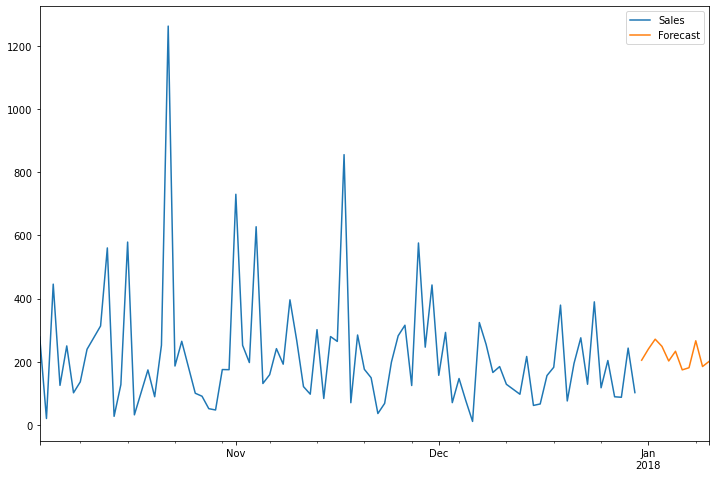

In [25]:
# Plotting the prediction values(Forecast) against the actual values(Sales) for SARIMAX model

import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df_sales['Sales'],order=(0, 1, 2),seasonal_order=(1,2,2,12))
results=model.fit()
df_sales2 = pd.DataFrame()
df_sales2['Forecast']=results.predict(start = len(df_sales), end = len(df_sales)+10,dynamic=True)
df_sales3=pd.concat([df_sales,df_sales2], axis=0, ignore_index=False)
df_sales3[['Sales','Forecast']].tail(100).plot(figsize=(12,8))

In [15]:
import statsmodels.api as sm

C:\Users\ashwa\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\ashwa\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\ashwa\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\ashwa\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\ashwa\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\ashwa\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\U

C:\Users\ashwa\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                 1458
Model:             SARIMAX(0, 1, 2)x(1, 2, 2, 12)   Log Likelihood              -10056.943
Date:                            Thu, 02 Dec 2021   AIC                          20125.886
Time:                                    18:30:45   BIC                          20157.377
Sample:                                01-03-2014   HQIC                         20137.656
                                     - 12-30-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8980      0.037    -24.413      0.000      -0.970      -0.826
ma.L2         -0.1469      0.022   

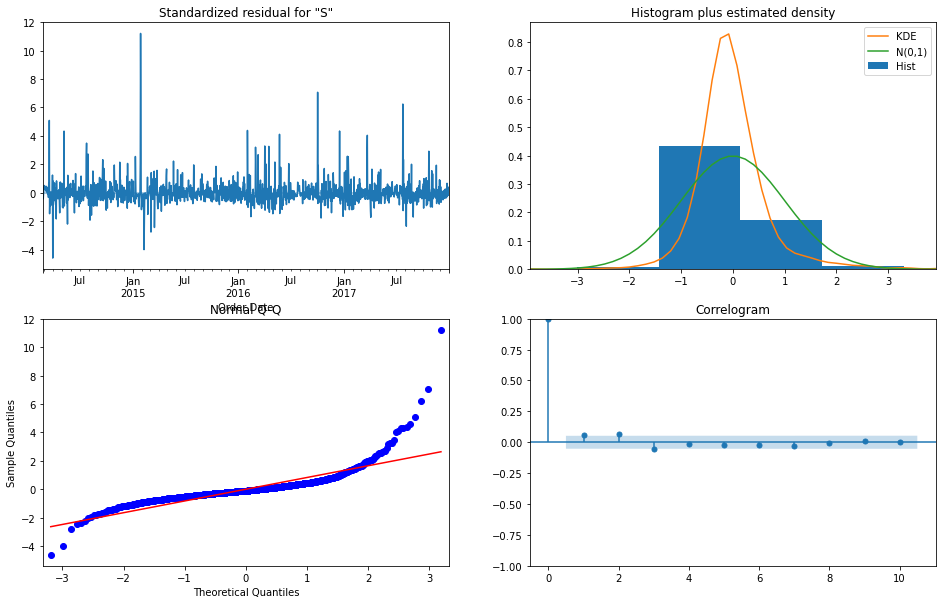

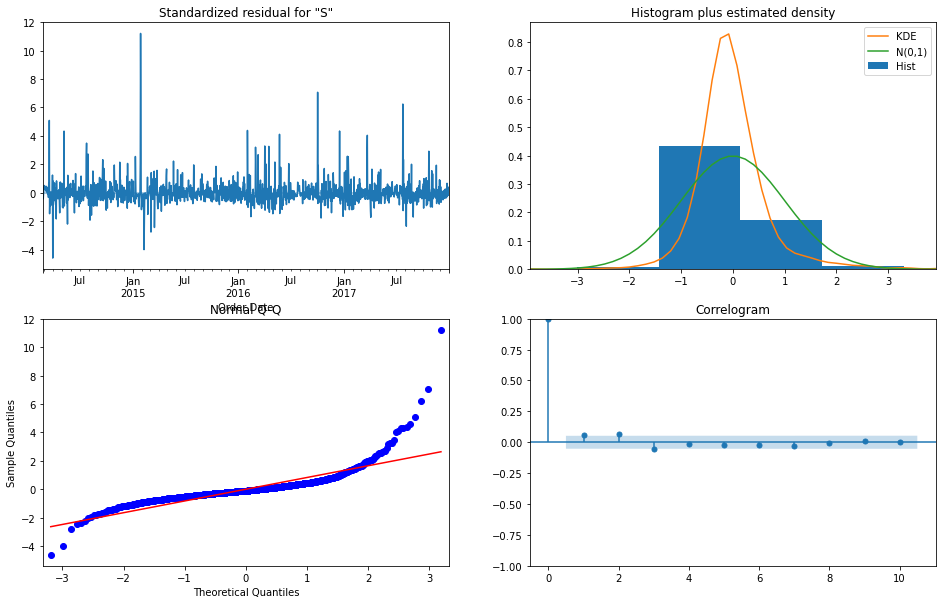

In [26]:
sarimax = sm.tsa.statespace.SARIMAX(df_sales['Sales'],
                                    order=(0, 1, 2),
                                    seasonal_order=(1,2,2,12), 
                                    enforce_stationarity=False, 
                                    enforce_invertibility=False,
                                    freq='D')
                                    
# Fit the model
output = sarimax.fit()
    
# Print output summary
print(output.summary())

# Plot diagnostics
output.plot_diagnostics(figsize=(16,10))

### Diagnostic plots:

From the diagnostic plots, we can infer that

a. The distribution of residuals of the sales prediction is normally distributed as shown in the Normal quantile(Q-Q) plot and density distribution/histogram plot.

b. The residuals are equally spread around the zero mean line and have fairly constant variance.

Hence, the results obtained from the prediction model should be meaningful.

## Plotly Dash

In [11]:
# Libraries required to create a dashboard

import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, Input, Output
import dash_core_components as dcc
import dash_html_components as html
from jupyter_dash import JupyterDash
import plotly.tools
import dash_bootstrap_components as dbc

In [14]:
# Designing the dashboard

app = JupyterDash(__name__,suppress_callback_exceptions=True,external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = html.Div([
    dbc.Row(
        html.H1("Sales Dashboard\n", className="text-primary",
                style={'text-align': 'center'})
    ),
        
    dbc.Row(children=[
        dbc.Col(children=[html.H4("State",
                                  style={'width':'50%','height': 30}),
                          dcc.Dropdown(id='states-dropdown',
                                       options=[{"label": k, "value": k} for k in geoDict.keys()],
                                       value='California',
                                       multi=False,className='mb-3',
                                       searchable=False,
                                       style={'width':'50%',
                                              'height': 30})]),
        dbc.Col(children=[html.H4("Category",
                                  style={'width':'50%','height': 30}),
                          dcc.Dropdown(id='category-dropdown',
                                       options=[{"label": k, "value": k} for k in catDict.keys()],
                                       value='Furniture',className='mb-3',
                                       multi=False,
                                       searchable=False,
                                       style={'width':'50%',
                                              'height': 30})])
    ]),
    
    dbc.Row(children=[
        dbc.Col([html.H4("City",
                         style={'width':'50%','height': 30}),
                 dcc.Dropdown(id='cities-dropdown', 
                              multi=False, 
                              searchable=False,className='mb-4',
                              placeholder="Select a city",
                              style={'width':'50%',
                                     'height': 30})]),
        
        dbc.Col([html.H4("Sub-Category",
                         style={'width':'50%','height': 30}),
                 dcc.Dropdown(id='subCategory-dropdown',
                              multi=False,
                              searchable=False,className='mb-4',
                              placeholder="Select a sub-category",
                              style={'width':'50%',
                                     'height': 30})])
    ]),
    
    dbc.Row(children=[
        dbc.Col([
            dcc.Graph(id='sunburst', figure={})]),
        
        dbc.Col([
            dcc.Graph(id='line', figure={})])
        
    ]),
    
     dbc.Row(children=[html.H3("Sales Prediction",
                         style={'width':'50%','height': 30}),
              dcc.Graph(id='pred_line', figure={})
             ])
    
])
        
@app.callback(
    Output('cities-dropdown', 'options'),
    Input('states-dropdown', 'value'))
def set_cities_options(selected_state):
    return [{'label': i, 'value': i} for i in geoDict[selected_state]]

@app.callback(
    Output('cities-dropdown', 'value'),
    Input('cities-dropdown', 'options'))
def set_cities_value(available_cities):
    return available_cities[0]['value']

@app.callback(
    Output('subCategory-dropdown', 'options'),
    Input('category-dropdown', 'value'))
def set_subCategory_options(selected_category):
    return [{'label': i, 'value': i} for i in catDict[selected_category]]

@app.callback(
    Output('subCategory-dropdown', 'value'),
    Input('subCategory-dropdown', 'options'))
def set_subCategory_value(available_options):
    return available_options[0]['value']

@app.callback(
    Output(component_id='line', component_property='figure'),
    [Input(component_id='category-dropdown', component_property='value'),
    Input(component_id='subCategory-dropdown', component_property='value')])
def update_linegraph(cat,subCat):
    dff = df_trans.copy()
    dff = dff[dff['Category'] == cat]
    dff = dff[dff['Sub-Category']==subCat]
    fig = px.line(dff, x=dff.index, y='Sales',color='Sub-Category')
    return fig

@app.callback(
    Output(component_id='sunburst', component_property='figure'),
    Input(component_id='states-dropdown', component_property='value'))
def update_sungraph(state):
    dff = df_trans.copy()
    dff = dff[dff['State'] == state]
    fig = px.sunburst(dff, path=['State', 'City','Category'], values='Sales')
    return fig

@app.callback(
    Output(component_id='pred_line', component_property='figure'),
    [Input(component_id='category-dropdown', component_property='value'),
    Input(component_id='subCategory-dropdown', component_property='value'),
    Input(component_id='states-dropdown', component_property='value'),
    Input(component_id='cities-dropdown', component_property='value')])
def update_pred_linegraph(cat, subCat, state, city):
    dff = df_trans.copy()
    dff = dff[dff['State'] == state]
    dff = dff[dff['City']==city]
    dff = dff[dff['Category'] == cat]
    dff = dff[dff['Sub-Category']==subCat]

    dff2 =  pd.DataFrame(dff['Sales'].resample('D').mean())
    dff2 = dff2.interpolate(method='linear') 
    
    sarimax = sm.tsa.statespace.SARIMAX(dff2['Sales'],order=(0, 1, 2),seasonal_order=(1,2,2,12), 
                                    enforce_stationarity=False, 
                                    enforce_invertibility=False,
                                    freq='D')
                                    
    # Fit the model
    output = sarimax.fit()
    
    #Predict
    df_pred = pd.DataFrame()
    df_pred['Forecast']=output.predict(start = len(dff2), end = len(dff2)+20,dynamic=True)
    df_comb=pd.concat([dff2,df_pred], axis=0, ignore_index=False)
    df_comb.fillna(0, inplace=True)
    df_comb['Value'] = df_comb['Sales']+ df_comb['Forecast']
    df_comb['isSales'] = ['Sales' if x!=0 else 'Forecast' for x in df_comb['Sales']]
    df_comb.drop(['Sales','Forecast'],axis=1,inplace=True)
    fig = px.line(df_comb, x=df_comb.index, y='Value',color='isSales')
    return fig

app.run_server(mode='external',host="localhost", port = 8055)

Dash app running on http://localhost:8055/
